In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.0 MB/s eta 0:00:0000:01m0:01m
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing i

In [9]:
!pip install --upgrade ultralytics supervision roboflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 37.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.8 MB/s eta 0:00:0000:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
google-colab 1.0.0 requires google-auth==2.38.0, but you have google-auth 2.40.1 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
google-spark-connect 0.5.2 requires google-api-core>=2.19.1, but you have google-api-core 1.34.1 which is incompatible.
google-cloud-bigtable 2.30.0 requires

In [26]:
yaml_content = """
train: /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/train
val: /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val
test: /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/test

nc: 1
names: ['lane']
"""
with open("/kaggle/working/data_model.yaml", "w+") as f:
    f.write(yaml_content)

In [11]:
from ultralytics import YOLO

# Load YOLOv11 segmentation model (replace with path if local)
model = YOLO("yolo11s-seg.pt")

# Train
results = model.train(
    data="/kaggle/working/data_model.yaml",
    epochs=6,
    imgsz=640,
    batch=8,
    name="yolo11_lane_seg",
    device=0,
    plots=True
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 19.7M/19.7M [00:00<00:00, 29.5MB/s]


Ultralytics 8.3.150 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data_model.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=6, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11_lane_seg, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

100%|██████████| 755k/755k [00:00<00:00, 4.52MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 19.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 22.9±12.0 MB/s, size: 93.0 KB)


train: Scanning /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/train/labels... 815 images, 0 backgrounds, 0 corrupt: 100%|██████████| 815/815 [00:02<00:00, 393.03it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 33.1±19.2 MB/s, size: 109.7 KB)


val: Scanning /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val/labels... 101 images, 0 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<00:00, 291.14it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val is not writeable, cache not saved.


Plotting labels to runs/segment/yolo11_lane_seg/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/yolo11_lane_seg
Starting training for 6 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/6       3.2G     0.8144      1.981      1.522      1.144         33        640: 100%|██████████| 102/102 [00:29<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.61it/s]

                   all        101        201      0.852      0.886      0.935      0.781      0.844      0.816      0.847      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/6      4.23G      0.706      1.241     0.7459       1.04         31        640: 100%|██████████| 102/102 [00:26<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.96it/s]

                   all        101        201      0.923      0.925      0.964      0.844      0.838      0.781      0.771      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/6      4.27G     0.6502       1.11     0.6499      1.002         29        640: 100%|██████████| 102/102 [00:26<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.95it/s]

                   all        101        201      0.966      0.978       0.99      0.913      0.946      0.959      0.969      0.734



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        4/6      4.31G     0.6029     0.9285     0.5706     0.9764         22        640: 100%|██████████| 102/102 [00:26<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.00it/s]

                   all        101        201       0.98       0.99      0.993       0.94       0.98      0.985      0.989      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        5/6      4.35G     0.5286     0.8306     0.5026     0.9513         23        640: 100%|██████████| 102/102 [00:26<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.99it/s]

                   all        101        201      0.968       0.98      0.992      0.967      0.963      0.975      0.988      0.906



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        6/6      4.39G     0.4754     0.7701     0.4383     0.9317         26        640: 100%|██████████| 102/102 [00:26<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.96it/s]

                   all        101        201      0.991          1      0.994      0.976      0.986      0.995       0.99      0.927



6 epochs completed in 0.048 hours.
Optimizer stripped from runs/segment/yolo11_lane_seg/weights/last.pt, 20.5MB
Optimizer stripped from runs/segment/yolo11_lane_seg/weights/best.pt, 20.5MB

Validating runs/segment/yolo11_lane_seg/weights/best.pt...
Ultralytics 8.3.150 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        101        201      0.991          1      0.994      0.976      0.986      0.995       0.99      0.927
Speed: 0.4ms preprocess, 7.3ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/segment/yolo11_lane_seg


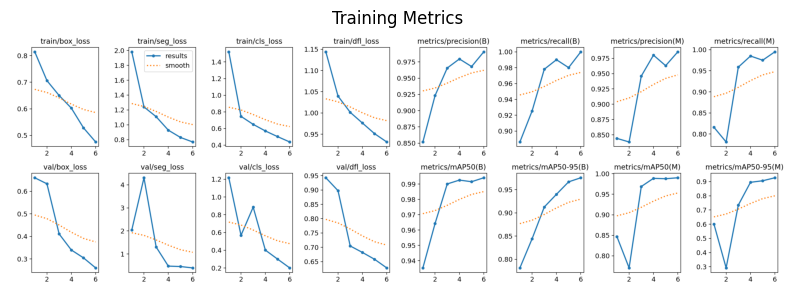

In [14]:
import matplotlib.pyplot as plt
import cv2

results_path = f"/kaggle/working/runs/segment/yolo11_lane_seg/results.png"
img = cv2.imread(results_path)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Training Metrics')
plt.show()


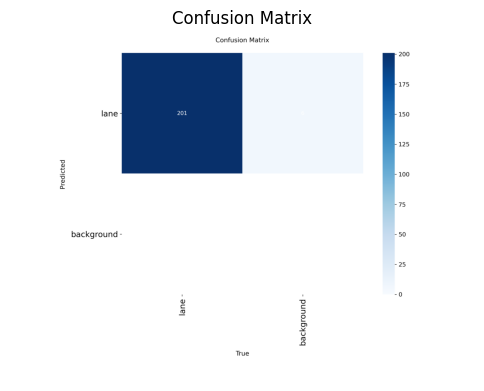

In [15]:
conf_matrix_path = f"/kaggle/working/runs/segment/yolo11_lane_seg/confusion_matrix.png"
conf_img = cv2.imread(conf_matrix_path)
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(conf_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# ✅ Load the trained model
model = YOLO('/kaggle/working/runs/segment/yolo11_lane_seg/weights/best.pt')

# ✅ Choose an image from your test set
image_path = '/kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/test/images/i101.jpg'  # CHANGE THIS NAME

# ✅ Run prediction
results = model.predict(source=image_path, save=True, save_txt=True, imgsz=640, conf=0.25)

# ✅ Get path to predicted image
predicted_img_path = os.path.join(results[0].save_dir, os.path.basename(image_path))

# ✅ Display prediction
img = cv2.imread(predicted_img_path)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("YOLOv11 Segmentation Output")
plt.show()



image 1/1 /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/test/images/i101.jpg: 640x640 2 lanes, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 12.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict
1 label saved to runs/segment/predict/labels


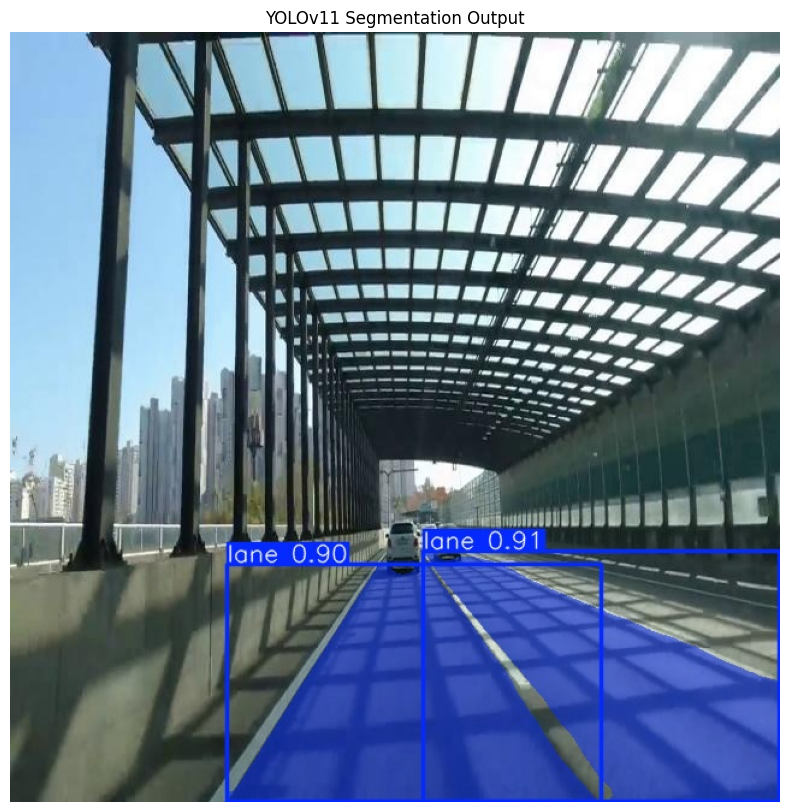

In [20]:
img = cv2.imread(predicted_img_path)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("YOLOv11 Segmentation Output")
plt.show()


In [38]:
!zip -r /kaggle/working/output.zip /kaggle/working/


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/yolo11n.pt (deflated 11%)
  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/segment/ (stored 0%)
  adding: kaggle/working/runs/segment/yolov5_seg2/ (stored 0%)
  adding: kaggle/working/runs/segment/yolov5_seg2/val_batch1_labels.jpg (deflated 8%)
  adding: kaggle/working/runs/segment/yolov5_seg2/F1_curve.png (deflated 16%)
  adding: kaggle/working/runs/segment/yolov5_seg2/confusion_matrix.png (deflated 38%)
  adding: kaggle/working/runs/segment/yolov5_seg2/P_curve.png (deflated 19%)
  adding: kaggle/working/runs/segment/yolov5_seg2/val_batch1_pred.jpg (deflated 8%)
  adding: kaggle/working/runs/segment/yolov5_seg2/R_curve.png (deflated 19%)
  adding: kaggle/working/runs/segment/yolov5_seg2/val_batch0_labels.jpg (deflated 7%)
  adding: kaggle/working/runs/segment/yolov5_seg2/val_batch2_labels.jpg (deflated 5%)
  adding: kaggle/working/runs/segment/yolov5_seg2/val_batch2_pred.jpg (deflated 5%)
  adding: 

In [24]:
from ultralytics import YOLO

# Load the best model
model = YOLO("/kaggle/working/runs/segment/yolo11_lane_seg/weights/best.pt")

# Evaluate the model on the test set
metrics = model.val(data="/kaggle/working/data_model.yaml", split='test')


Ultralytics 8.3.150 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 30.1±16.3 MB/s, size: 107.7 KB)


val: Scanning /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/test/labels... 103 images, 0 backgrounds, 0 corrupt: 100%|██████████| 103/103 [00:00<00:00, 389.26it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        103        206      0.986      0.995      0.995      0.968       0.99      0.985      0.994      0.918
Speed: 3.4ms preprocess, 8.5ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/segment/val2


In [26]:
# Segmentation metrics (for segmentation tasks)
print(f"Precision: {metrics.seg.mp():.4f}")
print(f"Recall:    {metrics.seg.mr():.4f}")
print(f"mAP@0.5:   {metrics.seg.map50():.4f}")
print(f"mAP@0.5:0.95: {metrics.seg.map():.4f}")


TypeError: 'numpy.float64' object is not callable

In [4]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17488, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 17488 (delta 0), reused 0 (delta 0), pack-reused 17486 (from 2)
Receiving objects: 100% (17488/17488), 16.59 MiB | 16.16 MiB/s, done.
Resolving deltas: 100% (11991/11991), done.
/kaggle/working/yolov5
Note: you may need to restart the kernel to use updated packages.


In [3]:
# ------------------------ COMMON IMPORTS ------------------------
import os
import cv2
import torch
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
from ultralytics import YOLO
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T
import torch.nn as nn
import torch.optim as optim

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'


transform = T.Compose([T.Resize((640, 640)), T.ToTensor()])
train_ds = LaneSegmentationDataset("/kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/train", "/kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/test", transform)
train_loader = DataLoader(train_ds, batch_size=4, shuffle=True)

# ------------------------ TRAIN YOLO MODELS ------------------------
def train_yolo(model_name, weights):
    model = YOLO(weights)
    model.train(data="/kaggle/working/data_model.yaml", epochs=6, imgsz=640, batch=8, name=model_name, device=DEVICE)
    metrics = model.val(data="/kaggle/working/data_model.yaml").seg
    return {
        "Model": model_name,
        "Precision": round(float(metrics.mp), 4),
        "Recall": round(float(metrics.mr), 4),
        "mAP@0.5": round(float(metrics.map50), 4),
        "mAP@0.5:0.95": round(float(metrics.map), 4)
    }

# Train YOLOv11, YOLOv8, YOLOv5
results_table = []
results_table.append(train_yolo("YOLOv11-seg", "yolo11s-seg.pt"))
results_table.append(train_yolo("YOLOv8-seg", "yolov8s-seg.pt"))



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 19.7M/19.7M [00:00<00:00, 212MB/s]


Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data_model.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=6, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=YOLOv11-seg, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

100%|██████████| 755k/755k [00:00<00:00, 29.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 104MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 19.2±8.2 MB/s, size: 93.0 KB)


train: Scanning /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/train/labels... 815 images, 0 backgrounds, 0 corrupt: 100%|██████████| 815/815 [00:02<00:00, 299.02it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 27.9±14.7 MB/s, size: 109.7 KB)


val: Scanning /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val/labels... 101 images, 0 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<00:00, 335.52it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val is not writeable, cache not saved.
Plotting labels to runs/segment/YOLOv11-seg/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/YOLOv11-seg
Starting training for 6 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/6      3.19G     0.8106      1.987      1.519      1.144         33        640: 100%|██████████| 102/102 [00:29<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]

                   all        101        201      0.964      0.937       0.98      0.882      0.968       0.94      0.972      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/6      4.21G     0.7009      1.264     0.7304      1.039         31        640: 100%|██████████| 102/102 [00:26<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.78it/s]

                   all        101        201      0.952       0.97      0.985      0.875      0.882      0.855      0.841      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/6      4.25G     0.6587      1.097     0.6717      1.005         29        640: 100%|██████████| 102/102 [00:26<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.97it/s]

                   all        101        201      0.907          1      0.976       0.88      0.905      0.995      0.976      0.797



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        4/6      4.29G      0.579     0.9356     0.5695     0.9683         22        640: 100%|██████████| 102/102 [00:26<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.90it/s]

                   all        101        201      0.978      0.985      0.989      0.941      0.958       0.96      0.957       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        5/6      4.34G     0.5159     0.8482     0.5017     0.9483         23        640: 100%|██████████| 102/102 [00:26<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.90it/s]

                   all        101        201       0.97          1      0.993      0.967      0.966      0.995      0.986        0.9



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        6/6      4.38G     0.4728     0.7665     0.4422     0.9319         26        640: 100%|██████████| 102/102 [00:26<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.05it/s]

                   all        101        201       0.99          1      0.995       0.97      0.985      0.995       0.99      0.904



6 epochs completed in 0.048 hours.
Optimizer stripped from runs/segment/YOLOv11-seg/weights/last.pt, 20.5MB
Optimizer stripped from runs/segment/YOLOv11-seg/weights/best.pt, 20.5MB

Validating runs/segment/YOLOv11-seg/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        101        201       0.99          1      0.995       0.97      0.985      0.995       0.99      0.904
Speed: 0.3ms preprocess, 7.6ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/segment/YOLOv11-seg
Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 155.3±79.7 MB/s, size: 91.1 KB)


val: Scanning /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val/labels... 101 images, 0 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<00:00, 843.97it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.25it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        101        201       0.99          1      0.995      0.969      0.985      0.995       0.99      0.905
Speed: 1.9ms preprocess, 9.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/segment/YOLOv11-seg2


100%|██████████| 22.8M/22.8M [00:00<00:00, 232MB/s]


Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data_model.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=6, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=YOLOv8-seg, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

train: Scanning /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/train/labels... 815 images, 0 backgrounds, 0 corrupt: 100%|██████████| 815/815 [00:00<00:00, 983.61it/s] 

WARNING ⚠️ train: Cache directory /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 101.6±76.0 MB/s, size: 109.7 KB)


val: Scanning /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val/labels... 101 images, 0 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<00:00, 508.41it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val is not writeable, cache not saved.


Plotting labels to runs/segment/YOLOv8-seg/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/YOLOv8-seg
Starting training for 6 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/6      3.25G     0.7946       2.04      1.417      1.126         33        640: 100%|██████████| 102/102 [00:26<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.87it/s]

                   all        101        201      0.817      0.925      0.911      0.767      0.576      0.622      0.542      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/6      4.24G     0.6743      1.231     0.7401      1.029         31        640: 100%|██████████| 102/102 [00:25<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.09it/s]

                   all        101        201      0.965      0.965      0.987      0.865       0.96       0.96      0.986      0.819



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/6      4.28G     0.6451      1.038     0.6596     0.9953         29        640: 100%|██████████| 102/102 [00:24<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.01it/s]

                   all        101        201      0.972       0.99      0.991       0.91      0.974       0.99      0.991      0.833



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        4/6      4.32G     0.5866     0.8782     0.5757     0.9756         22        640: 100%|██████████| 102/102 [00:24<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.71it/s]

                   all        101        201       0.97       0.97      0.987      0.926       0.94      0.931      0.962       0.83



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        5/6      4.36G     0.5105      0.787     0.4907     0.9454         23        640: 100%|██████████| 102/102 [00:24<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.19it/s]

                   all        101        201      0.974       0.99      0.992      0.955      0.969      0.985      0.991      0.935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        6/6       4.4G     0.4539     0.7258     0.4304      0.926         26        640: 100%|██████████| 102/102 [00:24<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.09it/s]

                   all        101        201      0.993          1      0.994      0.976      0.989      0.995      0.994      0.938



6 epochs completed in 0.045 hours.
Optimizer stripped from runs/segment/YOLOv8-seg/weights/last.pt, 23.8MB
Optimizer stripped from runs/segment/YOLOv8-seg/weights/best.pt, 23.8MB

Validating runs/segment/YOLOv8-seg/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        101        201      0.993          1      0.994      0.976      0.988      0.995      0.994      0.935
Speed: 0.7ms preprocess, 6.7ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/segment/YOLOv8-seg
Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 125.5±64.7 MB/s, size: 91.1 KB)


val: Scanning /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val/labels... 101 images, 0 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<00:00, 892.61it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.51it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        101        201      0.993          1      0.994      0.977      0.989      0.995      0.994      0.936
Speed: 1.6ms preprocess, 7.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/segment/YOLOv8-seg2


ModuleNotFoundError: No module named 'segmentation_models_pytorch'

In [19]:
import os
import torch
from torch.utils.data import Dataset
from PIL import Image, ImageDraw
import torchvision.transforms as transforms
import numpy as np

class LaneSegmentationDataset(Dataset):
    def __init__(self, image_dir, label_dir, transform=None, image_size=(256, 256)):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.transform = transform
        self.image_size = image_size

        self.images = [
            f for f in os.listdir(image_dir)
            if f.lower().endswith(('.jpg', '.jpeg')) and os.path.exists(
                os.path.join(label_dir, f.replace('.jpg', '.txt').replace('.jpeg', '.txt'))
            )
        ]

        if len(self.images) == 0:
            raise ValueError("No matching images and label .txt files found!")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.image_dir, img_name)
        label_path = os.path.join(self.label_dir, img_name.replace('.jpg', '.txt').replace('.jpeg', '.txt'))

        image = Image.open(img_path).convert("RGB")
        orig_w, orig_h = image.size
        target_w, target_h = self.image_size

        # Resize image
        if self.transform:
            image = self.transform(image)

        # Create blank mask
        mask = Image.new('L', (orig_w, orig_h), 0)
        draw = ImageDraw.Draw(mask)

        # Read label file and draw polygons/lines
        with open(label_path, 'r') as f:
            for line in f:
                parts = list(map(float, line.strip().split()))
                class_id = int(parts[0])  # Currently unused
                coords = parts[1:]
                points = []
                for i in range(0, len(coords), 2):
                    x = coords[i] * orig_w
                    y = coords[i + 1] * orig_h
                    points.append((x, y))
                if len(points) > 1:
                    draw.line(points, fill=1, width=5)

        # Resize mask to match image
        mask = mask.resize((target_w, target_h), Image.NEAREST)
        mask = transforms.ToTensor()(mask).squeeze().long()  # [H, W]

        return image, mask


In [20]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

train_dataset = LaneSegmentationDataset(
    image_dir="/kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/train/images",
    label_dir="/kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/train/labels",
    transform=transform,
    image_size=(256, 256)
)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)


In [22]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 8
NUM_CLASSES = 2  # background and lane
NUM_EPOCHS = 10
LEARNING_RATE = 1e-4
# ---------------------- Model ----------------------
model = smp.Unet(encoder_name="resnet18", encoder_weights="imagenet", in_channels=3, classes=NUM_CLASSES)
model.to(DEVICE)

# ---------------------- Loss & Optimizer ----------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# ---------------------- Training Loop ----------------------
for epoch in range(NUM_EPOCHS):
    model.train()
    epoch_loss = 0
    for imgs, masks in tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}"):
        imgs, masks = imgs.to(DEVICE), masks.to(DEVICE)
        preds = model(imgs)
        loss = criterion(preds, masks)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}: Loss = {epoch_loss / len(train_loader):.4f}")

# ---------------------- Save the model ----------------------
torch.save(model.state_dict(), "unet_lane_segmentation.pth")

Epoch 1/10: 100%|██████████| 102/102 [00:13<00:00,  7.68it/s]


Epoch 1: Loss = 0.2434


Epoch 2/10: 100%|██████████| 102/102 [00:13<00:00,  7.78it/s]


Epoch 2: Loss = 0.0806


Epoch 3/10: 100%|██████████| 102/102 [00:12<00:00,  7.85it/s]


Epoch 3: Loss = 0.0448


Epoch 4/10: 100%|██████████| 102/102 [00:13<00:00,  7.85it/s]


Epoch 4: Loss = 0.0289


Epoch 5/10: 100%|██████████| 102/102 [00:12<00:00,  7.94it/s]


Epoch 5: Loss = 0.0206


Epoch 6/10: 100%|██████████| 102/102 [00:13<00:00,  7.84it/s]


Epoch 6: Loss = 0.0151


Epoch 7/10: 100%|██████████| 102/102 [00:13<00:00,  7.69it/s]


Epoch 7: Loss = 0.0115


Epoch 8/10: 100%|██████████| 102/102 [00:13<00:00,  7.77it/s]


Epoch 8: Loss = 0.0091


Epoch 9/10: 100%|██████████| 102/102 [00:13<00:00,  7.73it/s]


Epoch 9: Loss = 0.0074


Epoch 10/10: 100%|██████████| 102/102 [00:12<00:00,  7.89it/s]


Epoch 10: Loss = 0.0061


In [23]:
pip install segmentation-models-pytorch ultralytics torchmetrics --quiet


Note: you may need to restart the kernel to use updated packages.


In [28]:
import os
import cv2
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from ultralytics import YOLO
import segmentation_models_pytorch as smp  # for U-Net


In [44]:
# Load U-Net model
unet_model = smp.Unet("resnet18", encoder_weights="imagenet", in_channels=3, classes=2)
unet_model = unet_model.to("cuda")
unet_model.load_state_dict(torch.load("/kaggle/working/unet_lane_segmentation.pth"))  # Adjust path
unet_model.eval()

# Load YOLOv8 model
model_yolov8 = YOLO("/kaggle/working/runs/segment/YOLOv8-seg/weights/best.pt")  # or your custom trained one

# Load YOLOv11 model
model_yolov11 = YOLO("/kaggle/working/runs/segment/YOLOv11-seg/weights/best.pt")  # if trained for segmentation



image 1/1 /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/test/images/i101.jpg: 640x640 3 lanes, 10.3ms
Speed: 1.6ms preprocess, 10.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/test/images/i101.jpg: 640x640 3 lanes, 10.9ms
Speed: 1.5ms preprocess, 10.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


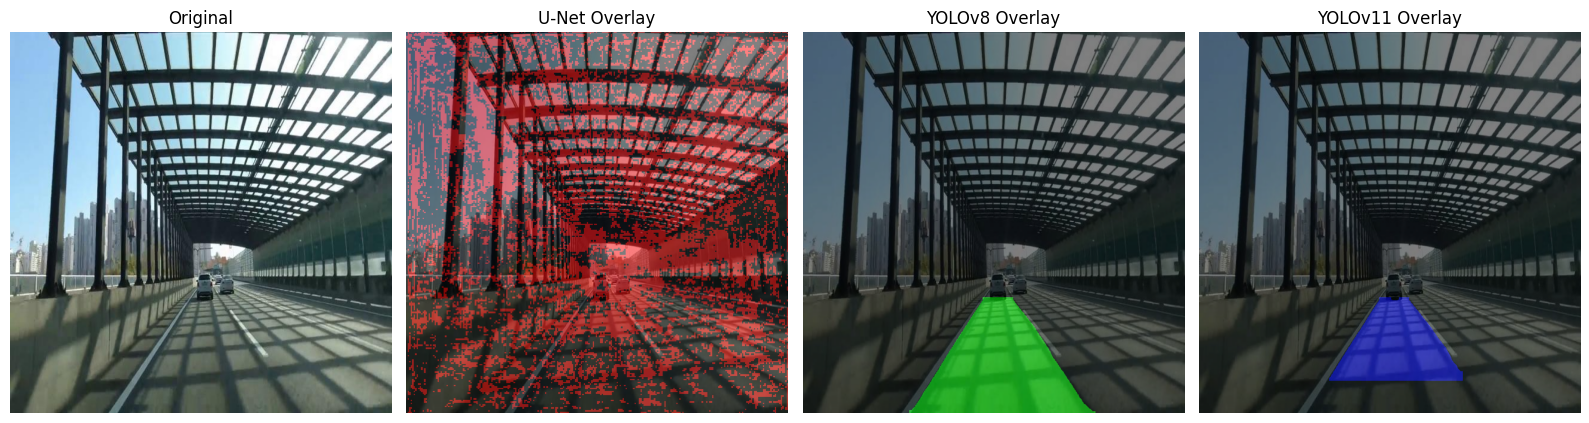

In [45]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from torchvision import transforms
from ultralytics import YOLO


# -------- Input Image ----------
img_path = "/kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/test/images/i101.jpg"
image_pil = Image.open(img_path).convert("RGB")
img_np = np.array(image_pil)
original_h, original_w = img_np.shape[:2]

# Preprocess for U-Net
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])
input_tensor = transform(image_pil).unsqueeze(0).to("cuda")

# Predict with U-Net
with torch.no_grad():
    output = model_unet(input_tensor)
    pred_unet = torch.argmax(output.squeeze(), dim=0).cpu().numpy()

# Resize prediction to original image size
pred_unet_resized = cv2.resize(pred_unet.astype(np.uint8), (original_w, original_h), interpolation=cv2.INTER_NEAREST)

# Predict with YOLOv8
results_v8 = model_yolov8(img_path)
pred_mask_yolov8 = results_v8[0].masks.data[0].cpu().numpy() if results_v8[0].masks else np.zeros((original_h, original_w), dtype=np.uint8)
pred_mask_yolov8 = cv2.resize(pred_mask_yolov8.astype(np.uint8), (original_w, original_h), interpolation=cv2.INTER_NEAREST)

# Predict with YOLOv11
results_v11 = model_yolov11(img_path)
pred_mask_yolov11 = results_v11[0].masks.data[0].cpu().numpy() if results_v11[0].masks else np.zeros((original_h, original_w), dtype=np.uint8)
pred_mask_yolov11 = cv2.resize(pred_mask_yolov11.astype(np.uint8), (original_w, original_h), interpolation=cv2.INTER_NEAREST)

# Helper to overlay mask on image
def overlay_mask(image, mask, color=(0, 255, 0), alpha=0.5):
    mask_rgb = np.zeros_like(image)
    mask_rgb[mask == 1] = color
    return cv2.addWeighted(image, 1 - alpha, mask_rgb, alpha, 0)

# Create overlays
overlay_unet = overlay_mask(img_np.copy(), pred_unet_resized, color=(255, 0, 0))     # Red for U-Net
overlay_yolov8 = overlay_mask(img_np.copy(), pred_mask_yolov8, color=(0, 255, 0))     # Green for YOLOv8
overlay_yolov11 = overlay_mask(img_np.copy(), pred_mask_yolov11, color=(0, 0, 255))   # Blue for YOLOv11

# Show images
plt.figure(figsize=(16, 6))

plt.subplot(1, 4, 1)
plt.imshow(img_np)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(overlay_unet)
plt.title("U-Net Overlay")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(overlay_yolov8)
plt.title("YOLOv8 Overlay")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(overlay_yolov11)
plt.title("YOLOv11 Overlay")
plt.axis('off')

plt.tight_layout()
plt.show()

In [20]:
!git clone https://github.com/ultralytics/yolov5  # clone


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!cd yolov5


In [6]:
!pip install -r /kaggle/working/yolov5/requirements.txt # install

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing ins

In [10]:
!cd yolov5

In [29]:
from ultralytics import YOLO

def train_yolo(model_name, weights):
    model = YOLO(weights)
    model.train(data="/kaggle/working/data_model.yaml", epochs=6, imgsz=640, batch=8, name=model_name,task="segment")
    metrics = model.val(data="/kaggle/working/data_model.yaml").seg
    return True


train_yolo("yolov5_seg","yolov5s.pt")

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data_model.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=6, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mas

train: Scanning /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/train/labels... 815 images, 0 backgrounds, 0 corrupt: 100%|██████████| 815/815 [00:00<00:00, 1033.20it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 124.3±78.6 MB/s, size: 109.7 KB)


val: Scanning /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val/labels... 101 images, 0 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<00:00, 543.86it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val is not writeable, cache not saved.


Plotting labels to runs/segment/yolov5_seg/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/yolov5_seg
Starting training for 6 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/6      2.45G     0.8202      1.312      1.163         33        640: 100%|██████████| 102/102 [00:18<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.43it/s]


                   all        101        201      0.746      0.985      0.978      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/6      2.73G     0.6917        0.8      1.054         31        640: 100%|██████████| 102/102 [00:17<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.66it/s]

                   all        101        201      0.792      0.949      0.803      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/6      2.76G     0.6535     0.6975      1.022         29        640: 100%|██████████| 102/102 [00:17<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.42it/s]

                   all        101        201      0.942      0.965      0.983      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/6      2.79G     0.5756     0.5955     0.9792         22        640: 100%|██████████| 102/102 [00:17<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.32it/s]

                   all        101        201      0.947      0.995      0.992      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/6      2.82G     0.5268     0.5244      0.963         23        640: 100%|██████████| 102/102 [00:17<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.48it/s]

                   all        101        201      0.988      0.985      0.993      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/6      2.85G     0.4796      0.455     0.9441         26        640: 100%|██████████| 102/102 [00:17<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]

                   all        101        201       0.99      0.997      0.992       0.97



6 epochs completed in 0.031 hours.
Optimizer stripped from runs/segment/yolov5_seg/weights/last.pt, 18.5MB
Optimizer stripped from runs/segment/yolov5_seg/weights/best.pt, 18.5MB

Validating runs/segment/yolov5_seg/weights/best.pt...
Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv5s summary (fused): 84 layers, 9,111,923 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        101        201       0.99      0.997      0.992       0.97
Speed: 0.4ms preprocess, 4.7ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/segment/yolov5_seg
Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv5s summary (fused): 84 layers, 9,111,923 parameters, 0 gradients, 23.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 176.6±90.0 MB/s, size: 91.1 KB)


val: Scanning /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val/labels... 101 images, 0 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<00:00, 866.67it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.20it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        101        201       0.99      0.997      0.992      0.972
Speed: 1.9ms preprocess, 4.7ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/segment/yolov5_seg2


AttributeError: 'DetMetrics' object has no attribute 'seg'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP).

    Attributes:
        names (Dict[int, str]): A dictionary of class names.
        box (Metric): An instance of the Metric class for storing detection results.
        speed (Dict[str, float]): A dictionary for storing execution times of different parts of the detection process.
        task (str): The task type, set to 'detect'.
        stats (Dict[str, List]): A dictionary containing lists for true positives, confidence scores, predicted classes, target classes, and target images.
        nt_per_class: Number of targets per class.
        nt_per_image: Number of targets per image.
    

In [30]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from torchvision import transforms
from ultralytics import YOLO

img_path = "/kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/test/images/i101.jpg"
image_pil = Image.open(img_path).convert("RGB")
img_np = np.array(image_pil)
original_h, original_w = img_np.shape[:2]